<a href="https://colab.research.google.com/github/ashfaqfardin/Numerical-Method-Assignments/blob/main/1930087_Lab_5_Section_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this lab we will learn about the K-Nearest Neighbor algorithm. We will implement the K-Nearest Neighbor algorithm and apply it to real-world data. We will use the K-Nearest Neighbor algorithm to classify cat and dog images from PetImages dataset. 

#### **Import necessary packages**

We will use numpy, matplotlib, cv2, os, and sklearn packages in this lab. We will also use the KNeighborsClassifier from sklearn.neighbors and confusion_matrix from sklearn.metrics.

In [ ]:
# Write appropriate code

In [ ]:
import os
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

#### **Download and load the data**

We will use a PetImages dataset. This dataset contains **200 RGB images** of cats and dogs. The images are of **random sizes**. The dataset is available at [here](https://drive.google.com/file/d/1Zs_446z9XoPZOD3UNyou0ndsN_EXrYoW/view?usp=sharing). Download the dataset from the link and extract it. The dataset contains two folders, Cat and Dog. Each folder contains 100 images of cats and dogs respectively. We will use these images to train our K-Nearest Neighbor classifier. Upload the folder named PetImagesSmall to the root directory of your Google Drive. Then, mount your Google Drive to the Colab notebook by running the following code.
```python
from google.colab import drive
drive.mount('/content/drive')
```


In [ ]:
# Write appropriate code
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# !unzip "/content/drive/MyDrive/Dataset/PetImagesSmall.zip" -d "/content/drive/MyDrive/Dataset/data"

 #### **Preprocess the data**

We will now load the PetImages dataset from the Google Drive and process it. Follow the steps below to load the dataset and preprocess it.

#### **Step 1: Define the path to the dataset**

Let's remind you of the directory structure of the dataset. We have two folders, Cat and Dog in the PetImagesSmall folder. Each folder contains 100 images of cats and dogs respectively.

- PetImagesSmall
  - Cat
    - 0.jpg
    - 1.jpg
    - 2.jpg
    - ...
    - 99.jpg
  - Dog
    - 0.jpg
    - 1.jpg
    - 2.jpg
    - ...
    - 99.jpg

We will take the path to the PetImagesSmall folder as the path to the dataset. We will define the path to the dataset as follows:
```python
dataset_path = '/content/drive/MyDrive/Dataset/data'
```

Create two more variables, cat_path and dog_path. Set cat_path to the path to the Cat folder and dog_path to the path to the Dog folder. We will use these variables to load the images of cats and dogs from the dataset.
```python
cat_path = os.path.join(dataset_path, 'Cat')
dog_path = os.path.join(dataset_path, 'Dog')
```

In [ ]:
# Write appropriate code
dataset_path = "/content/drive/MyDrive/Dataset/data"

cat_path = os.path.join(dataset_path, "Cat")
dog_path = os.path.join(dataset_path, "Dog")


#### **Step 2: Load the images**

We will now load the images of cats and dogs from the dataset. Create two empty lists, `cat_images` and `dog_images`. We will use these lists to store the images of cats and dogs respectively.
```python
cat_images = []
dog_images = []
```

`os.listdir()` returns a list of all the files and folders in the given directory. We will use this function to get the list of all the images in the Cat and Dog folders. We will loop through the list of images in the Cat folder and do the following:

- Read the image
- Resize the image to 100x100
- Convert the RGB image to grayscale
- Flatten the image using `np.ravel()`
- Append the flattened image to the cat_images

Finally, convert the cat_images list to a numpy array using `np.asarray()`. Here is the sample pseudocode to do the above steps:
```python
for image in cat_images_list:
  # Read the image
  # Resize the image
  # Convert the image to grayscale
  # Convert the image to a numpy array
  # Flatten the image
  # Append the flattened image to cat_images

cat_images = np.asarray(cat_images)
```

We will do the same for the Dog folder. After the above steps, the cat_images array will contain 100 flattened grayscale images of cats and the dog_images array will contain 100 flattened grayscale images of dogs.

In [ ]:
cat_images = []
dog_images = []

In [ ]:
# Write appropriate code
cat_images_list = os.listdir(cat_path)
# print(images)
for image in cat_images_list:
  img_path = os.path.join(cat_path, image)
  # print(img_path)
  img = cv2.imread(img_path, 0)
  img = cv2.resize(img, (100, 100))
  flattened_img = np.ravel(img)
  cat_images.append(flattened_img)


In [ ]:
# Write appropriate code
dog_images_list = os.listdir(dog_path)
# print(images)
for image in dog_images_list:
  img_path = os.path.join(dog_path, image)
  # print(img_path)
  img = cv2.imread(img_path, 0)
  img = cv2.resize(img, (100, 100))
  flattened_img = np.ravel(img)
  dog_images.append(flattened_img)


In [ ]:
len(cat_images), len(dog_images)

(100, 100)

#### **Step 3: Create the labels**

We will now create the labels for the images. Let's say **0 represents the cat** and **1 represents the dog**. We will create two numpy arrays, `cat_labels` and `dog_labels`. The `cat_labels` array will contain **100 0s** and the `dog_labels` array will contain **100 1s**. Create the `cat_labels` array using `np.zeros()` and the `dog_labels` array using `np.ones()`.

In [ ]:
# Write appropriate code
cat_labels = np.zeros((100, 1))
dog_labels = np.ones((100, 1))

#### **Step 4: Concatenate the images and labels**

We will now concatenate the images and labels. Create two numpy arrays, `images` and `labels`. Concatenate the `cat_images` and `dog_images` arrays using `np.concatenate()` and store the result in the `images` array. Concatenate the `cat_labels` and `dog_labels` arrays using `np.concatenate()` and store the result in the `labels` array. Use `np.ravel()` to flatten the `labels` array.

In [ ]:
# Write appropriate code
images = np.concatenate((cat_images, dog_images), axis = 0)
labels = np.concatenate((cat_labels, dog_labels), axis = 0)
labels = np.ravel(labels)
images.shape, labels.shape

((200, 10000), (200,))

#### **Step 5: Shuffle the images and labels**

Write a function named `shuffle_data()` that takes two numpy arrays, `images` and `labels` as input and returns two numpy arrays, `shuffled_images` and `shuffled_labels`. The function should shuffle the images and labels and return the shuffled images and labels. You can use `np.random.permutation()` to shuffle the images and labels. 

```python
def shuffle_data(images, labels):
  # Create a numpy array of indices
  # Shuffle the indices
  # Shuffle the images and labels using the shuffled indices
  # Return the shuffled images and labels
```

Use the `shuffle_data()` function to shuffle the images and labels. Store the shuffled images and labels in the `images` and `labels` arrays respectively.

In [ ]:
# Write appropriate code
def shuffle_data(images, labels):
  # Create a numpy array of indices
  idx = np.arange(images.shape[0])
  # print(idx[0:10])
  # Shuffle the indices
  np.random.shuffle(idx)
  # print(idx[0:10])
  # Return the shuffled images and labels
  return images[idx], labels[idx]


In [ ]:
shuffled_images, shuffled_labels = shuffle_data(images, labels)
print(labels[:10], shuffled_labels[:10])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [1. 0. 1. 0. 0. 0. 1. 0. 0. 0.]


#### **Step 6: Split the data**

Now, we will split the data into training and testing sets. We will use 80% of the data for training and 20% of the data for testing. 

Create four numpy arrays, `train_images`, `train_labels`, `test_images`, and `test_labels`. Use `np.split()` to split the `images` and `labels` into training and testing sets. 
* Store the training images and labels in the `train_images` and `train_labels` arrays respectively. 
* Store the testing images and labels in the `test_images` and `test_labels` arrays respectively.

In [ ]:
# Write appropriate code
train_images, train_labels = shuffled_images[0:160], shuffled_labels[0:160]
test_images, test_labels = shuffled_images[160:], shuffled_labels[160:]

#### **Use scikit-learn to train the K-Nearest Neighbor classifier**

We will now use scikit-learn to train the K-Nearest Neighbor classifier. Use the `KNeighborsClassifier()` function to create a K-Nearest Neighbor classifier. Set the number of neighbors to 3. Then, use the `fit()` function to train the classifier using the training images and labels. Predict the labels of the testing images using the `predict()` function. Finally, use the `score()` function to calculate the accuracy of the classifier. Print the accuracy.

Additionally you can use the `confusion_matrix()` function to calculate the confusion matrix and print the actual and predicted labels of the testing images. You can also show a few sample images from the testing set and print the actual and predicted labels of the images.

Accuracy: 0.6
Confusion Matrix: 
[[ 9 11]
 [ 5 15]]
Actual:  [1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1.
 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0.]
Predicted:  [1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0.
 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0.]


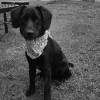

Actual:  Dog
Predicted:  Dog


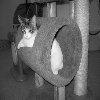

Actual:  Cat
Predicted:  Dog


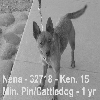

Actual:  Dog
Predicted:  Dog


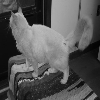

Actual:  Cat
Predicted:  Cat


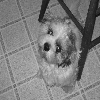

Actual:  Dog
Predicted:  Cat


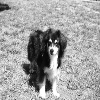

Actual:  Dog
Predicted:  Dog


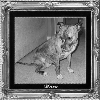

Actual:  Dog
Predicted:  Dog


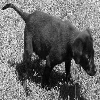

Actual:  Dog
Predicted:  Dog


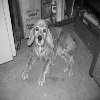

Actual:  Dog
Predicted:  Dog


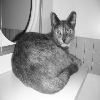

Actual:  Cat
Predicted:  Cat


In [ ]:
# Write appropriate code
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(train_images, train_labels)

predictions = classifier.predict(test_images)

score = classifier.score(test_images, test_labels)
print(f"Accuracy: {score}")

print("Confusion Matrix: ")
print(confusion_matrix(test_labels, predictions))

print("Actual: ", test_labels)
print("Predicted: ", predictions)

# Check few predictions
for i in range(10):
    cv2_imshow(test_images[i].reshape(100, 100))
    print("Actual: ", "Cat" if test_labels[i] == 0 else "Dog")
    print("Predicted: ", "Cat" if predictions[i] == 0 else "Dog")

#### **Implement the K-Nearest Neighbor algorithm from scratch**

We will now implement the K-Nearest Neighbor algorithm from scratch. KNN algorithm uses a fixed number of training examples to predict the label of a new data point. 

In our case, we will use the training images to predict the label of a new image. We will calculate the euclidean distance between the new image and all the training images. Then, we will find the K nearest neighbors of the new image. We will use the labels of the K nearest neighbors to predict the label of the new image. The predicted label will be the label that occurs the most number of times among the K nearest neighbors.

The whole process is explained in the following diagram:

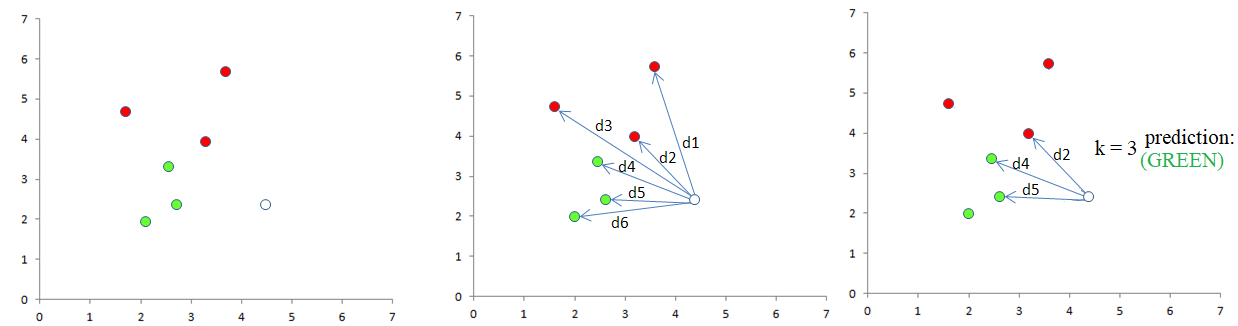

Now, follow the steps below to implement the KNN algorithm from scratch.

#### **Step 1: Calculate the euclidean distance**

Write a function named `euclidean_distance()` that takes two numpy arrays, `image` and `train_image` as input. `train_images` is a numpy array of images from the training set. The function should calculate the euclidean distance between the each image in the `train_images` array and the `image` array. The function should return a numpy array of euclidean distances. The euclidean distance between two images can be calculated using the following formula:

$$euclidean\_distance = \sqrt{(image\_1 - image\_2)^2}$$

In [ ]:
# Write appropriate code
def euclidean_distance(image, train_images):
  euclidean_distance = np.sqrt(np.sum((image - train_images)**2, axis = 1))
  return euclidean_distance

#### **Step 2: Find the nearest neighbor**

Now, we will find the nearest neighbor of a new image. Write a function named `nearest_neighbor()` that takes three inputs, `new_image`, `train_images`, and `train_labels`. The function should return the label of the nearest neighbor of the new image. The function should do the following:

- Calculate the euclidean distance between the new image and all the training images using the `euclidean_distance()` function and store the result in a numpy array named `distances`.
- Sort the `distances` array using `np.argsort()` and store the result in a numpy array named `sorted_indices`. 
- Now, as `sorted_indices` contains the indices of the training images sorted by their distance from the new image, the first element of the `sorted_indices` array will contain the index of the training image that is closest to the new image. Store the label of the nearest neighbor in a variable named `nearest_neighbor`. 
- Return the variable `nearest_neighbor`.

Call the `nearest_neighbor()` function to find the nearest neighbor of the first image in the testing set. Print the actual and predicted labels of the image.

In [ ]:
# Write appropriate code
def nearest_neighbor(new_image, train_images, train_labels):
  distances = euclidean_distance(new_image, train_images)
  sorted_indices = np.argsort(distances)
  nearest_neighbor = train_labels[sorted_indices[0]]
  return nearest_neighbor

In [ ]:
nearest_neighbor(test_images[1], train_images, train_labels), test_labels[1]

(1.0, 0.0)

#### **Step 3: Find the K nearest neighbors**

The function we have defined is able to determine the nearest neighbour based on only watching one neighbour. We can extend this to find the K nearest neighbours. Where we will find the K nearest neighbours and then determine the most common label among them and return that as the predicted label.

Update the `nearest_neighbor()` function in such a way that it takes an additional input, `k`. The function should return the label of the K nearest neighbors of the new image. Rename the function to `k_nearest_neighbors()`. You have to do the following:

- Change the function name to `k_nearest_neighbors()`.
- Add an extra parameter named `k` to the function definition. k is the number of nearest neighbors to find.
- Update the line number 4 of the function and get the labels for the first `k` elements of the `indices` array. Rename the variable `nearest_neighbor` to `nearest_neighbors`.
- Use the `np.unique()` function to find the unique labels and their counts in the `nearest_neighbors` array. Store the result in a variables named `values` and `counts` respectively.
- Use the `np.argmax()` function to find the index of the most common label in the `counts` array. Use the index to get the most common label from the `values` array. Store the most common label in a variable named `predicted_label`.
- Return the variable `predicted_label`.

Call the `k_nearest_neighbors()` function to find the K nearest neighbors of the first image in the testing set. Print the actual and predicted labels of the image.

In [ ]:
# Write appropriate code

#### **Step 4: Predict the labels of the testing images**

Now, we will use the `k_nearest_neighbors()` function to predict the labels of all the testing images. Write a function named `predict()` that takes three inputs, `test_images`, `train_images`, and `train_labels`. The function should return a numpy array of predicted labels. The function should do the following:

- Create an empty numpy array named `predicted_labels`.
- Loop through all the images in the `test_images` array. For each image, call the `k_nearest_neighbors()` function to find the K nearest neighbors of the image. Append the predicted label to the `predicted_labels` array.
- Return the `predicted_labels` array.

Call the `predict()` function to predict the labels of the testing images and store the result in a variable named `predicted_labels`. Print the actual and predicted labels of the first 10 images in the testing set.

In [ ]:
# Write appropriate code

#### **Step 5: Calculate the accuracy**

Now, we will calculate the accuracy of the KNN classifier. Write a function named `accuracy()` that takes two inputs, `predicted_labels` and `test_labels`. The function should return the accuracy of the classifier. The function should do the following:

- Calculate the number of correct predictions by comparing the `predicted_labels` array with the `test_labels` array. Store the result in a variable named `correct_predictions`.
- Calculate the accuracy by dividing the `correct_predictions` by the total number of testing images. Store the result in a variable named `accuracy`.
- Return the accuracy.

Call the `accuracy()` function to calculate the accuracy of the KNN classifier. Print the accuracy.

In [ ]:
# Write appropriate code

#### **Step 6: Visualize the performance of the classifier**

Use scikit-learn built in `confusion_matrix()` function to create a confusion matrix. Print the confusion matrix. Check out a few sample images from the testing set and print the actual and predicted labels of the images. Observe where the classifier is making mistakes and try to understand why the classifier is making mistakes.

In [ ]:
# Write appropriate code